In [1]:
import os

os.chdir("..")
print(f"Changed working directory to: {os.getcwd()}")

Changed working directory to: /Users/gabriel.torres/Nextcloud/Development/Pro5D/FlareSense


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
bursts = pd.read_parquet('data/raw/burst_list_20231212.parquet')
bursts

,date,time,type,instruments,time_start,time_end,date_start,date_end,datetime_start,datetime_end
0,20210119,02:42-02:42,3,Australia-ASSA,02:42,02:42,20210119,20210119,2021-01-19 02:42:00,2021-01-19 02:42:00
1,20210120,12:37-12:37,3,AUSTRIA-UNIGRAZ,12:37,12:37,20210120,20210120,2021-01-20 12:37:00,2021-01-20 12:37:00
2,20210120,12:37-12:37,3,HUMAIN,12:37,12:37,20210120,20210120,2021-01-20 12:37:00,2021-01-20 12:37:00
3,20210120,12:37-12:37,3,MRT1,12:37,12:37,20210120,20210120,2021-01-20 12:37:00,2021-01-20 12:37:00
4,20210120,12:37-12:37,3,SOUTHAFRICA-SANSA,12:37,12:37,20210120,20210120,2021-01-20 12:37:00,2021-01-20 12:37:00
...,...,...,...,...,...,...,...,...,...,...
39699,20231212,10:04-10:08,3,INDIA-OOTY,10:04,10:08,20231212,20231212,2023-12-12 10:04:00,2023-12-12 10:08:00
39700,20231212,10:04-10:08,3,NORWAY-EGERSUND,10:04,10:08,20231212,20231212,2023-12-12 10:04:00,2023-12-12 10:08:00
39701,20231212,10:04-10:08,3,SWISS-Landschlacht,10:04,10:08,20231212,20231212,2023-12-12 10:04:00,2023-12-12 10:08:00
39702,20231212,10:04-10:08,3,SWISS-MUHEN,10:04,10:08,20231212,20231212,2023-12-12 10:04:00,2023-12-12 10:08:00


Anhand von Radio-sunburst-labelcreation Repository vom i4DS, haben wir folgende Labels exportiert.
Hier sind alle annotierten Bursts vom 19 Januar 2021 bis zum 12 Dezember 2023 enthalten.

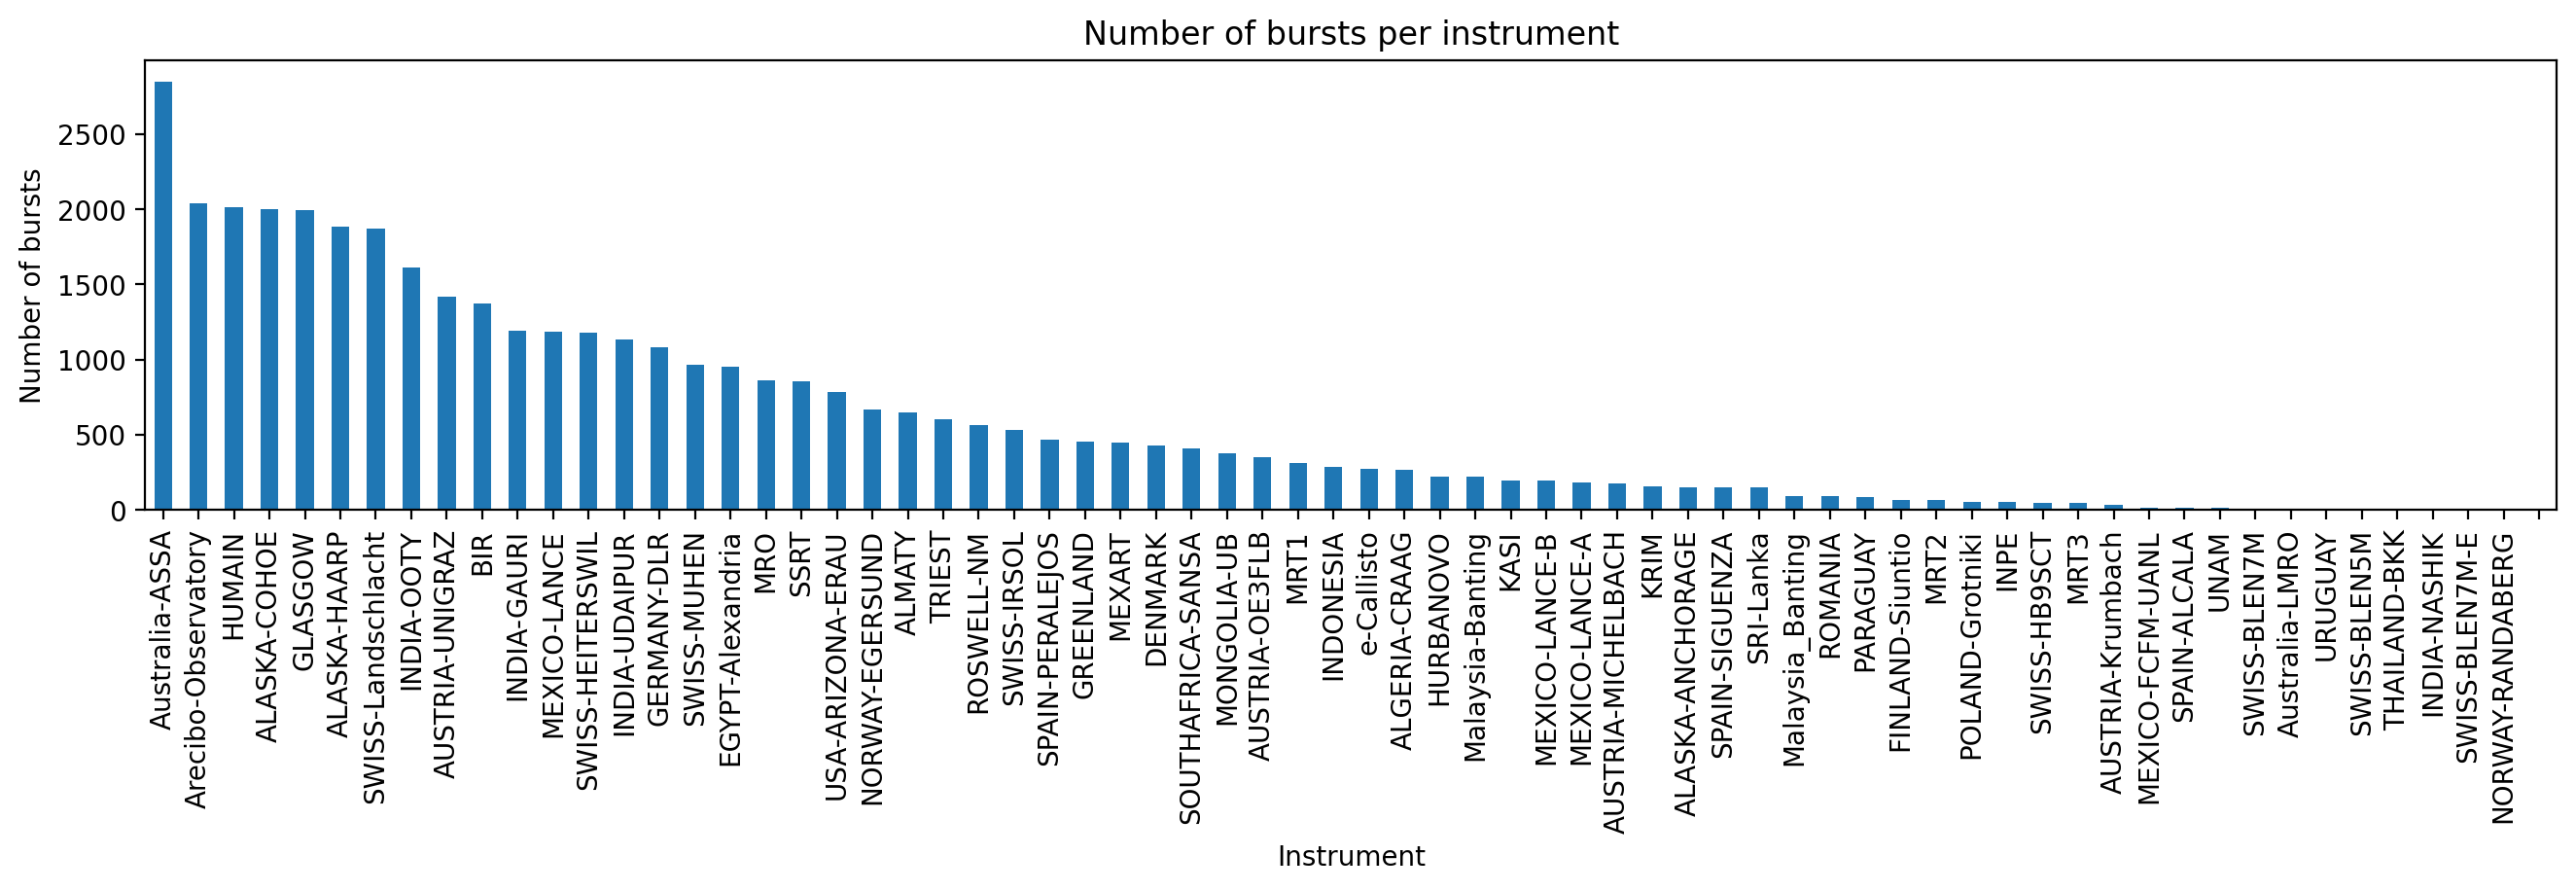

In [20]:
plt.figure(figsize=(16, 3), dpi=200)
bursts.groupby('instruments').size().sort_values(ascending=False).plot.bar()
plt.title("Number of bursts per instrument")
plt.xlabel("Instrument")
plt.ylabel("Number of bursts")
plt.show()

In [5]:
bursts["length"] = bursts["datetime_end"] - bursts["datetime_start"]

# where lenght is 0, set to 1 minute
bursts.loc[bursts["length"] == pd.Timedelta(0), "length"] = pd.Timedelta(minutes=1)
bursts.loc[bursts["length"] == pd.Timedelta(0), "datetime_end"] = bursts["datetime_start"] + pd.Timedelta(minutes=1)

# remove bursts with negative length
bursts = bursts.loc[bursts["length"] > pd.Timedelta(0)]

# remove bursts with a length of over 60 minutes
bursts = bursts.loc[bursts["length"] < pd.Timedelta(minutes=60)]

# filter Australia-ASSA
bursts_filtered = bursts.loc[bursts["instruments"] == "Australia-ASSA"]

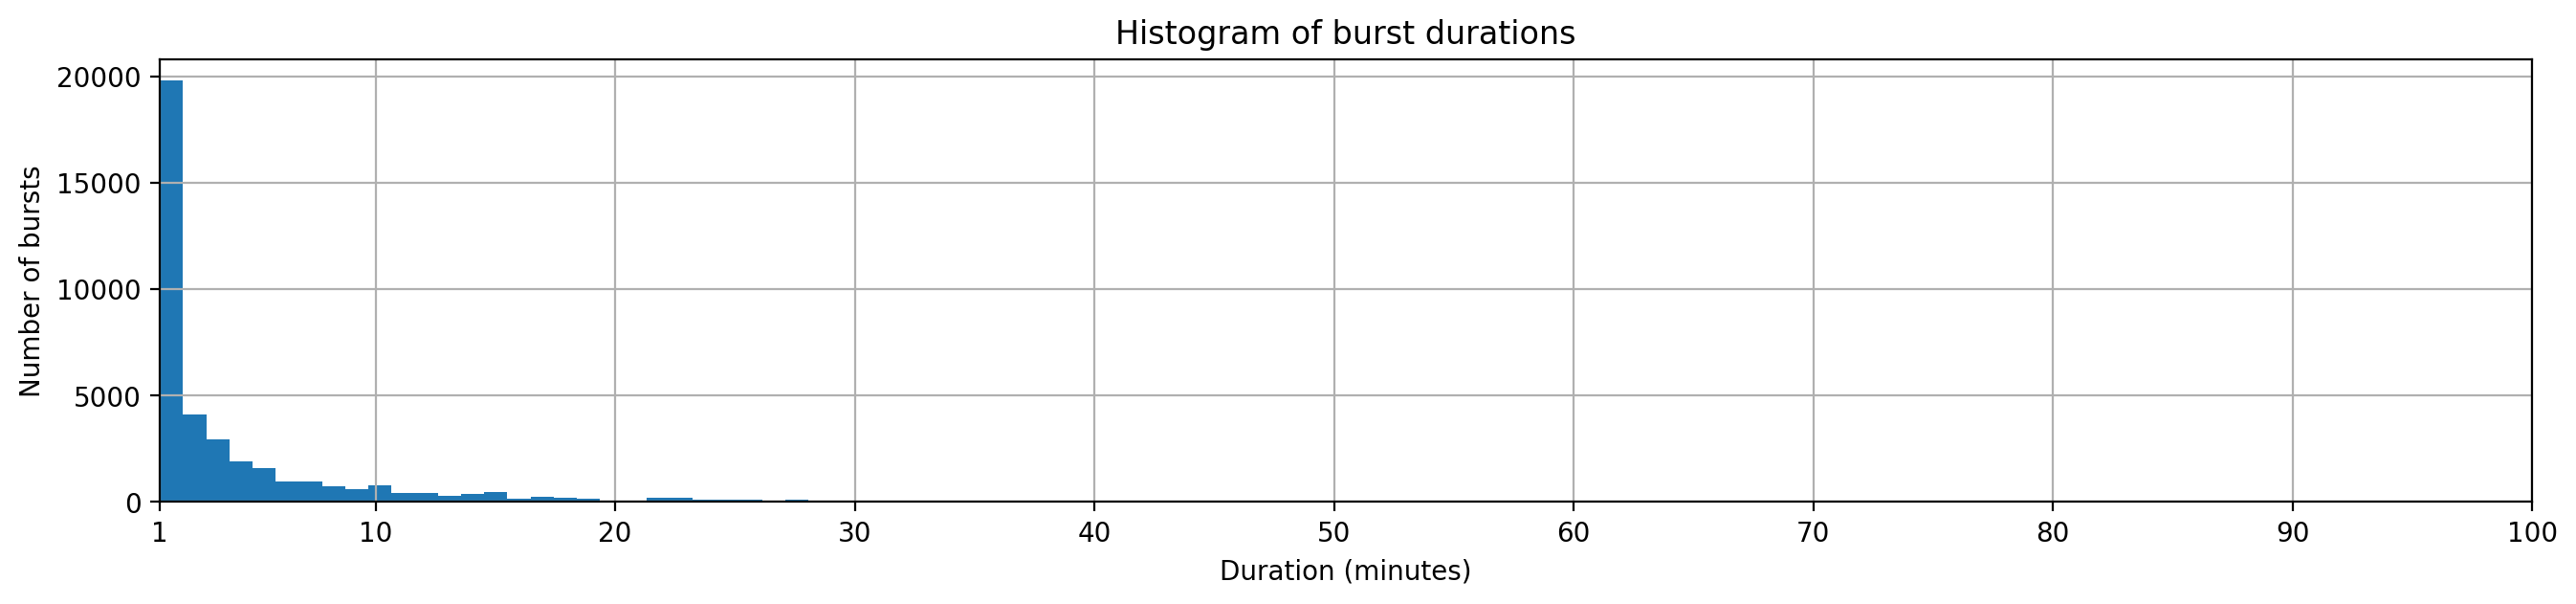

In [15]:
plt.figure(figsize=(16, 3), dpi=200)
(bursts["length"].dt.total_seconds() / 60).hist(bins=60)
plt.xlim(1, 100)
plt.title("Histogram of burst durations")
plt.xlabel("Duration (minutes)")
plt.ylabel("Number of bursts")
plt.xticks([1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.show()

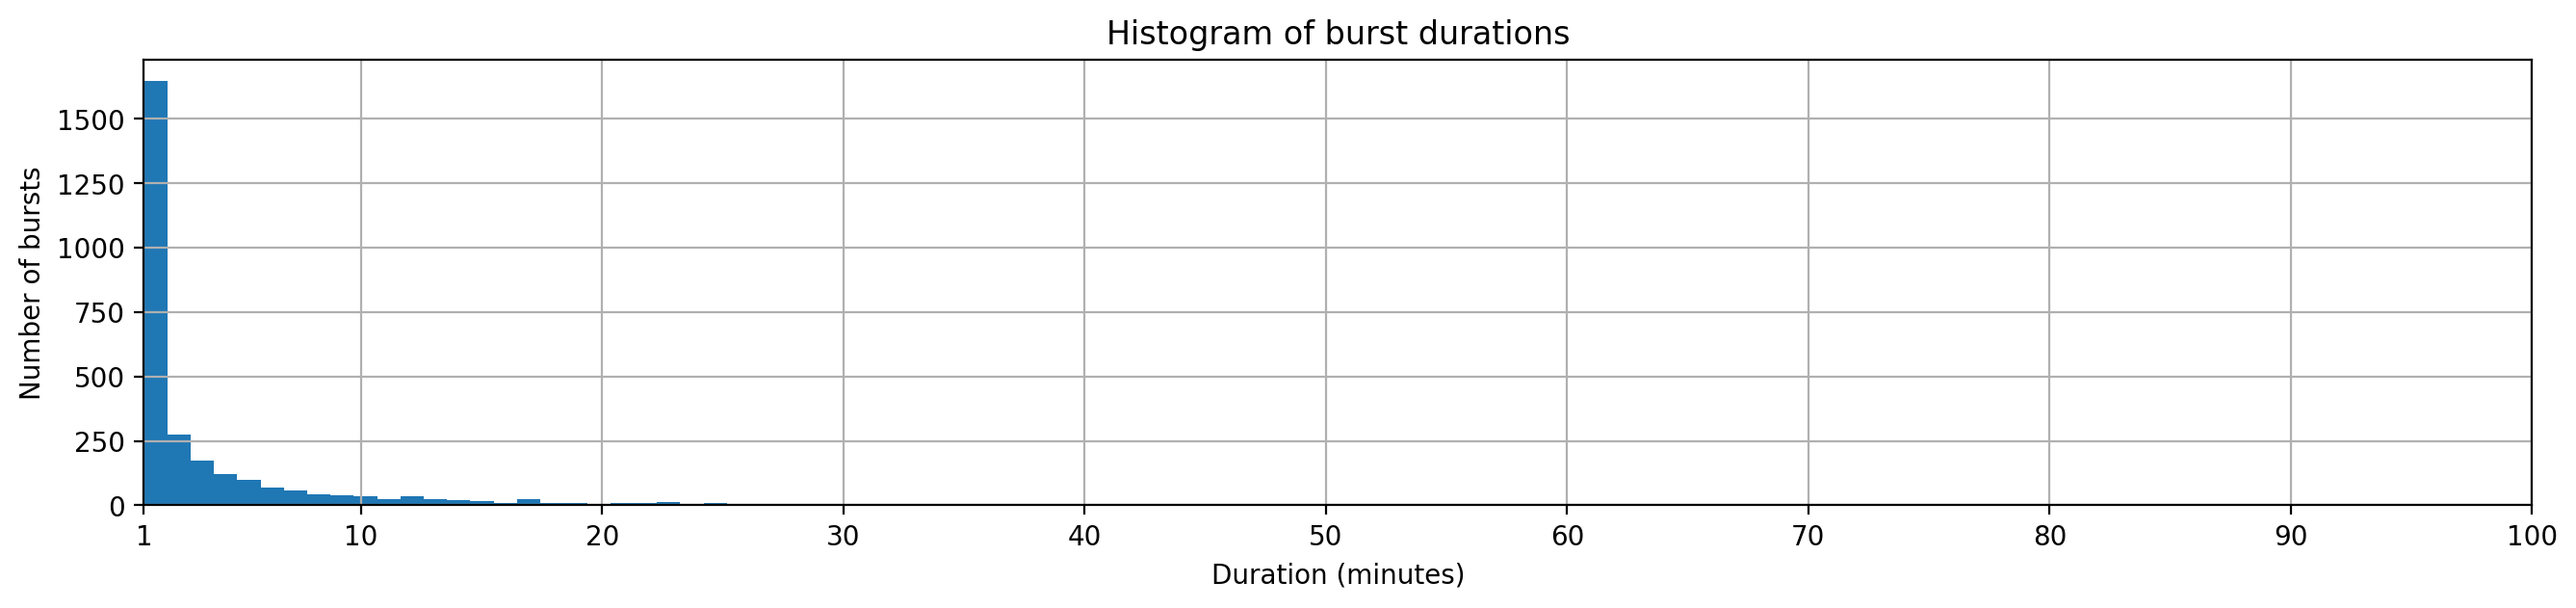

In [18]:
plt.figure(figsize=(16, 3), dpi=200)
(bursts_filtered["length"].dt.total_seconds() / 60).hist(bins=60)
plt.xlim(1, 100)
plt.title("Histogram of burst durations")
plt.xlabel("Duration (minutes)")
plt.ylabel("Number of bursts")
plt.xticks([1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.show()

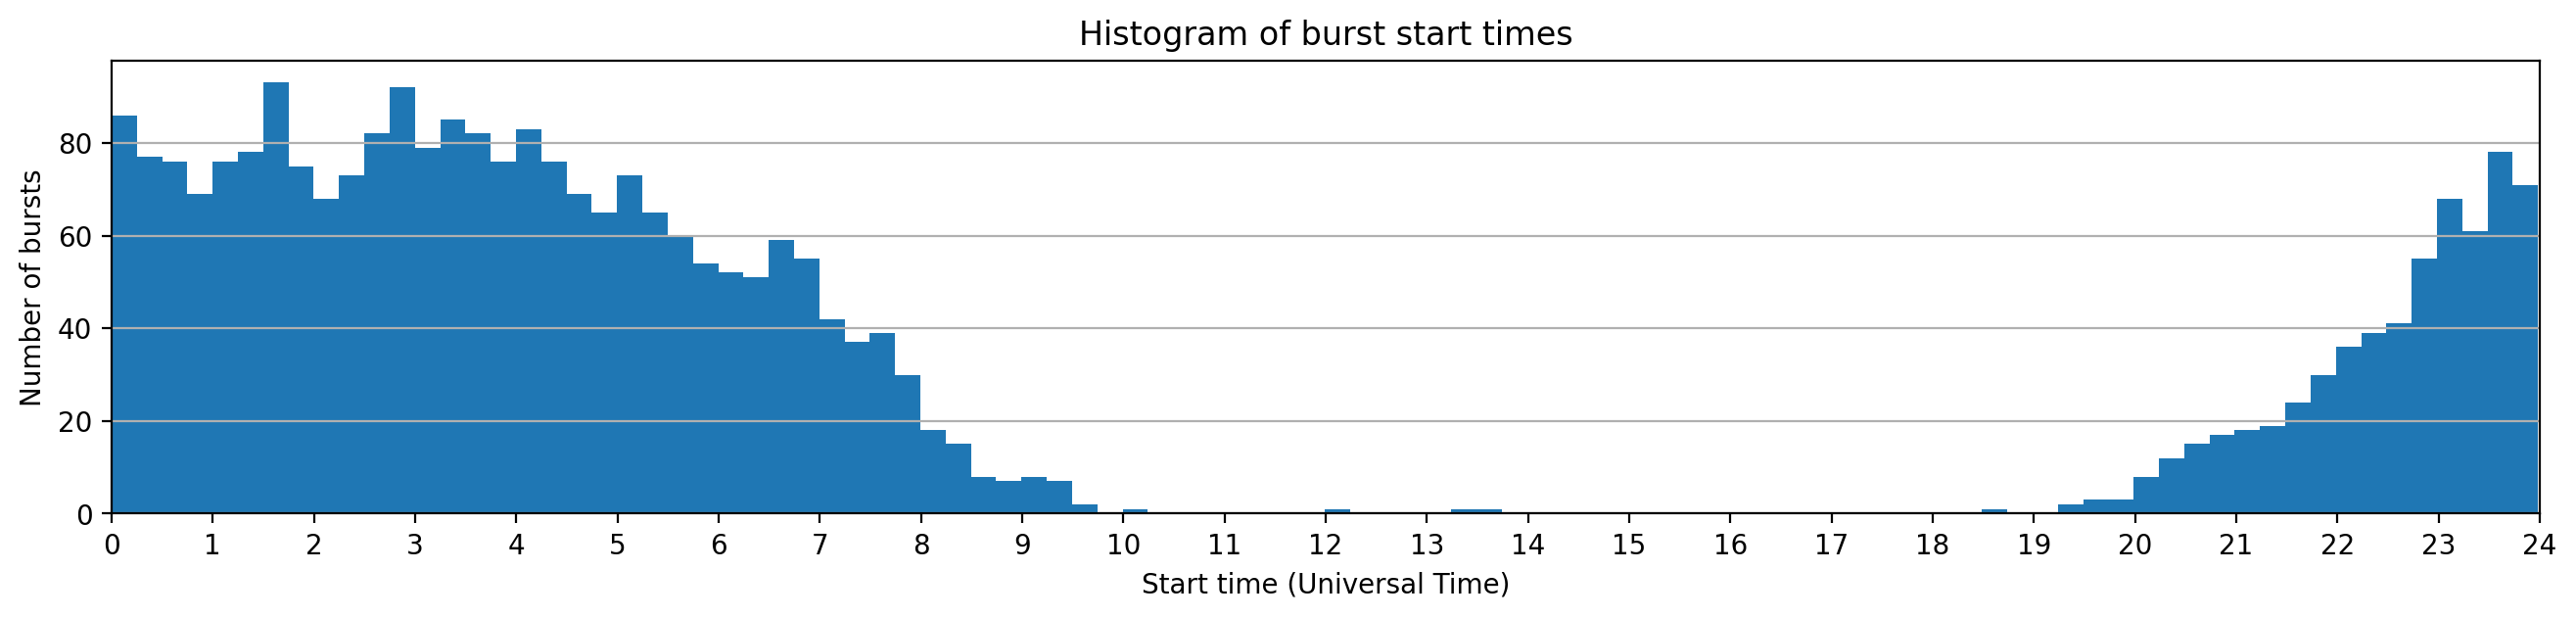

In [26]:
# Time distribution of bursts
plt.figure(figsize=(16, 3), dpi=200)
start_times = bursts_filtered["datetime_start"].dt.hour + bursts_filtered["datetime_start"].dt.minute / 60
start_times.hist(bins=96)
plt.title("Histogram of burst start times")
plt.xlim(0, 24)
plt.xticks(range(0, 25, 1))
plt.xlabel("Start time (Universal Time)")
plt.ylabel("Number of bursts")
plt.grid(axis="x")
plt.show()


In [9]:
start_times.value_counts()

datetime_start
3.550000     14
0.000000     12
2.783333     12
1.583333     11
0.666667     11
             ..
21.216667     1
23.166667     1
20.700000     1
21.150000     1
21.283333     1
Name: count, Length: 729, dtype: int64